In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns

20

In [2]:
crop_yield = pd.read_csv("./raw_data/fao_data/FAOSTAT_data_en_2-9-2023.csv")
change_temp = pd.read_csv("./raw_data/fao_data/FAOSTAT_data_en_2-9-2023 (1).csv")
precip = pd.read_csv("./raw_data/precipitation/observed_average_annual_precipitation.csv")
air_temp_mean = pd.read_csv("./raw_data/air_temperature/average_air_temperature.txt", sep=";", index_col=False)
frost_days = pd.read_csv("./raw_data/frost_days/regional_averages_tnas_year.txt", sep=";", skiprows=1)
hot_days = pd.read_csv("./raw_data/hot_days/regional_averages_txbs_year.txt", sep=";", skiprows=1)
ice_days = pd.read_csv("./raw_data/ice_days/regional_averages_txcs_year.txt", sep=";", skiprows=1)
summer_days = pd.read_csv("./raw_data/summer_days/regional_averages_txas_year.txt", sep=";", skiprows=1)#, index_col=False) 
sunshine_duration = pd.read_csv("./raw_data/sunshine_duration/regional_averages_sd_year.txt", sep=";", skiprows=1) # hours
tropical_nights = pd.read_csv("./raw_data/tropical_nights/regional_averages_tnes_year.txt", sep=";",skiprows=1)

### Creating the working set (FAO Data)

In [3]:
crop_data_official = crop_yield.loc[(crop_yield["Flag"] == "A") | (crop_yield["Flag"] == "E")]
crop_data_official = crop_yield.loc[(crop_yield["Element"] == "Yield")]
crop_data_official = crop_data_official.reset_index(drop=True)
crop_data_official = crop_data_official.drop_duplicates()
crop_data_official.shape

(2791, 14)

In [4]:
temp_data = change_temp
temp_change_data = temp_data[temp_data["Element"] == "Temperature change"]
temp_change_data.shape

(61, 14)

In [5]:
# Combines both dataframes and creates the final FAO dataframe
final_fao = crop_data_official[["Year", "Flag Description", "Element", "Item", "Value", "Unit"]] \
.merge(temp_change_data[["Year", "Flag Description", "Element", "Value", "Unit"]], left_on="Year", right_on="Year", how="inner")
final_fao

,Year,Flag Description_x,Element_x,Item,Value_x,Unit_x,Flag Description_y,Element_y,Value_y,Unit_y
0,1985,Imputed value,Yield,Apples,188887.0,hg/ha,Estimated value,Temperature change,-0.804,°C
1,1985,Imputed value,Yield,Apricots,20624.0,hg/ha,Estimated value,Temperature change,-0.804,°C
2,1985,Estimated value,Yield,Asparagus,26121.0,hg/ha,Estimated value,Temperature change,-0.804,°C
3,1985,Estimated value,Yield,Barley,49648.0,hg/ha,Estimated value,Temperature change,-0.804,°C
4,1985,Unofficial figure,Yield,"Beans, dry",35945.0,hg/ha,Estimated value,Temperature change,-0.804,°C
...,...,...,...,...,...,...,...,...,...,...
2786,1984,Estimated value,Yield,Sugar beet,431721.0,hg/ha,Estimated value,Temperature change,-0.115,°C
2787,1984,Estimated value,Yield,Tomatoes,247879.0,hg/ha,Estimated value,Temperature change,-0.115,°C
2788,1984,Estimated value,Yield,Unmanufactured tobacco,19279.0,hg/ha,Estimated value,Temperature change,-0.115,°C
2789,1984,Unofficial figure,Yield,Vetches,11027.0,hg/ha,Estimated value,Temperature change,-0.115,°C


In [6]:
final_fao[(final_fao["Year"] == 2010)].sample(10)# & final_data["Item"] == "Wheat"]#.iloc[0]

,Year,Flag Description_x,Element_x,Item,Value_x,Unit_x,Flag Description_y,Element_y,Value_y,Unit_y
1306,2010,Official figure,Yield,Spinach,157297.0,hg/ha,Estimated value,Temperature change,0.182,°C
1295,2010,Official figure,Yield,"Peas, dry",30049.0,hg/ha,Estimated value,Temperature change,0.182,°C
1279,2010,Official figure,Yield,Lettuce and chicory,208490.0,hg/ha,Estimated value,Temperature change,0.182,°C
1269,2010,Official figure,Yield,Carrots and turnips,534361.0,hg/ha,Estimated value,Temperature change,0.182,°C
1278,2010,Official figure,Yield,Leeks and other alliaceous vegetables,347274.0,hg/ha,Estimated value,Temperature change,0.182,°C
1286,2010,Official figure,Yield,"Onions and shallots, dry (excluding dehydrated)",441810.0,hg/ha,Estimated value,Temperature change,0.182,°C
1268,2010,Official figure,Yield,Cabbages,543891.0,hg/ha,Estimated value,Temperature change,0.182,°C
1280,2010,Estimated value,Yield,Linseed,10206.0,hg/ha,Estimated value,Temperature change,0.182,°C
1314,2010,Official figure,Yield,Wheat,72120.0,hg/ha,Estimated value,Temperature change,0.182,°C
1308,2010,Official figure,Yield,Sugar beet,643522.0,hg/ha,Estimated value,Temperature change,0.182,°C


In [7]:
final_fao = final_fao.drop("Flag Description_y", axis=1)
final_fao = final_fao.rename(columns={"Flag Description_x":"Flag Description", "Value_x":"Value", 
                                      "Unit_x":"Unit", "Element_x": "Food Element", "Element_y":"Temperature Element", 
                                      "Value_y":"Degrees", "Unit_y":"Temp Unit"})

In [8]:
final_fao

,Year,Flag Description,Food Element,Item,Value,Unit,Temperature Element,Degrees,Temp Unit
0,1985,Imputed value,Yield,Apples,188887.0,hg/ha,Temperature change,-0.804,°C
1,1985,Imputed value,Yield,Apricots,20624.0,hg/ha,Temperature change,-0.804,°C
2,1985,Estimated value,Yield,Asparagus,26121.0,hg/ha,Temperature change,-0.804,°C
3,1985,Estimated value,Yield,Barley,49648.0,hg/ha,Temperature change,-0.804,°C
4,1985,Unofficial figure,Yield,"Beans, dry",35945.0,hg/ha,Temperature change,-0.804,°C
...,...,...,...,...,...,...,...,...,...
2786,1984,Estimated value,Yield,Sugar beet,431721.0,hg/ha,Temperature change,-0.115,°C
2787,1984,Estimated value,Yield,Tomatoes,247879.0,hg/ha,Temperature change,-0.115,°C
2788,1984,Estimated value,Yield,Unmanufactured tobacco,19279.0,hg/ha,Temperature change,-0.115,°C
2789,1984,Unofficial figure,Yield,Vetches,11027.0,hg/ha,Temperature change,-0.115,°C


### Creating the working Subset (DWD Data)

In [9]:
# Changing hours to days
sunshine_duration["Deutschland"] = sunshine_duration["Deutschland"].apply(lambda x: (x / 24) / 365)
#sunshine_duration["Deutschland"] = sunshine_duration["modified"]

In [10]:
de_pre = precip[["Category", "Annual Mean"]]
de_pre = de_pre.rename(columns={"Annual Mean":"Annual Mean Precipitation"})
de_temp = air_temp_mean[["Jahr", "Deutschland"]]
de_temp = de_temp.rename(columns={"Deutschland":"Air Temp Mean"})
de_frost = frost_days[["Jahr", "Deutschland"]]
de_frost = de_frost.rename(columns={"Deutschland":"Frost Days"})
de_hot = hot_days[["Jahr", "Deutschland"]]
de_hot = de_hot.rename(columns={"Deutschland":"Hot Days"})
de_ice = ice_days[["Jahr", "Deutschland"]]
de_ice = de_ice.rename(columns={"Deutschland":"Ice Days"})
de_sum = summer_days[["Jahr", "Deutschland"]]
de_sum = de_sum.rename(columns={"Deutschland":"Summer Days"})
de_sun = sunshine_duration[["Jahr", "Deutschland"]]
de_sun = de_sun.rename(columns={"Deutschland":"Sunshine Duration"})
de_trop = tropical_nights[["Jahr", "Deutschland"]]
de_trop = de_trop.rename(columns={"Deutschland":"Tropical Nights"})

In [11]:
## Merging all of the sub dataframes
final_dwd = de_pre.merge(de_temp, how="inner", left_on="Category", right_on="Jahr").merge(de_frost, how="inner").\
                    merge(de_hot, how="inner").merge(de_ice, how="inner").merge(de_sum, how="inner").merge(de_sun, how="inner").merge(de_trop, how="inner")

In [12]:
# master_dwd = master_dwd.set_index("Jahr", drop=True)
final_dwd = final_dwd.drop(columns=["Category"])

In [13]:
final_dwd

,Annual Mean Precipitation,Jahr,Air Temp Mean,Frost Days,Hot Days,Ice Days,Summer Days,Sunshine Duration,Tropical Nights
0,714.44,1951,8.72,85.57,3.02,9.81,27.53,0.195400,0.01
1,757.37,1952,7.94,109.43,7.91,25.70,30.70,0.179989,0.75
2,575.68,1953,8.94,94.54,5.08,23.40,32.96,0.203642,0.01
3,806.06,1954,7.70,96.70,2.53,33.25,17.18,0.178128,0.01
4,719.08,1955,7.54,117.22,0.93,31.93,21.40,0.186495,0.00
...,...,...,...,...,...,...,...,...,...
66,814.74,2017,9.58,76.17,6.80,16.63,39.01,0.182203,0.04
67,571.21,2018,10.45,77.35,20.37,14.64,74.72,0.230068,1.35
68,676.23,2019,10.28,69.74,16.97,7.69,52.29,0.209384,0.82
69,661.60,2020,10.43,62.51,11.39,3.71,45.37,0.216438,0.74


### Random Data

In [14]:
co2 = np.loadtxt(r"./raw_data/co2_mm_mlo.txt")
co2 = pd.DataFrame(data=co2, columns=["Year","Month","decimal date", "monthly average", "de-seasonalized", " number of days", "st.dev of days", "unc. of monthly mean"])
co2["Year"] = co2["Year"].astype(int)

In [15]:
co2.dtypes

Year                      int32
Month                   float64
decimal date            float64
monthly average         float64
de-seasonalized         float64
 number of days         float64
st.dev of days          float64
unc. of monthly mean    float64
dtype: object

In [16]:
co2 = co2[["Year", "monthly average"]]
co2 = co2.groupby("Year", as_index=False).mean()

In [17]:
co2

,Year,monthly average
0,1958,315.232000
1,1959,315.980833
2,1960,316.910000
3,1961,317.644167
4,1962,318.454167
...,...,...
61,2019,411.654167
62,2020,414.238333
63,2021,416.450833
64,2022,418.564167


### Merging all datasets (FAO DWD RANDOM)

In [26]:
final_data = final_fao.merge(final_dwd, how="inner", left_on="Year", right_on="Jahr")
final_data = final_data.merge(co2, how="inner", left_on="Year", right_on="Year")
final_data = final_data.rename(columns={"Value":"Yield", "monthly average":"CO2 Average"})

## Exploring the dataset

In [27]:
explore = final_data[["Year", "Yield", "Degrees", "Annual Mean Precipitation", "Air Temp Mean", "Frost Days", "Hot Days", "Ice Days", "Summer Days", "Sunshine Duration", "Tropical Nights", "CO2 Average"]]
explore.shape

(2791, 12)

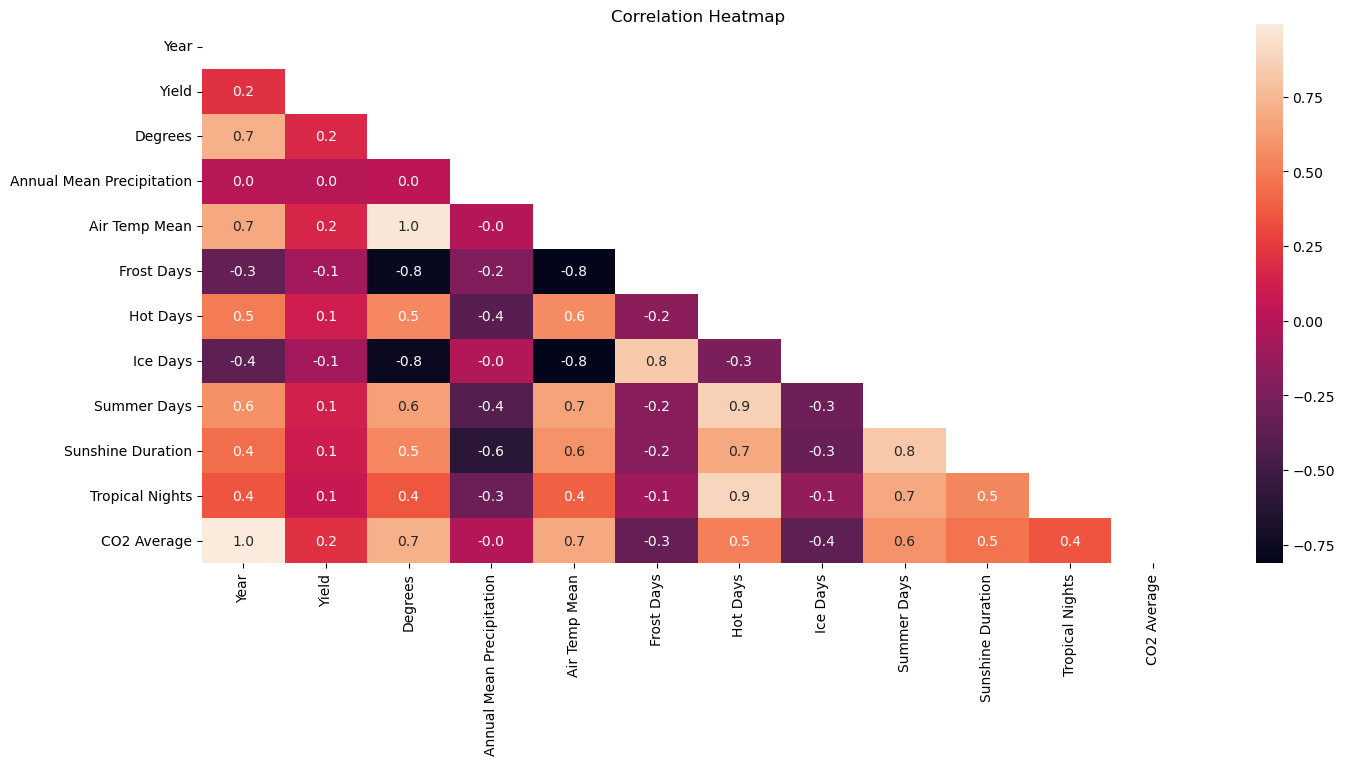

In [28]:
plt.figure(figsize=(16, 7))
mask = np.triu(np.ones_like(explore.corr(), dtype=bool))
heatmap = sns.heatmap(explore.corr(method='pearson'), mask=mask, annot=True, fmt=".1f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=1);
plt.show()

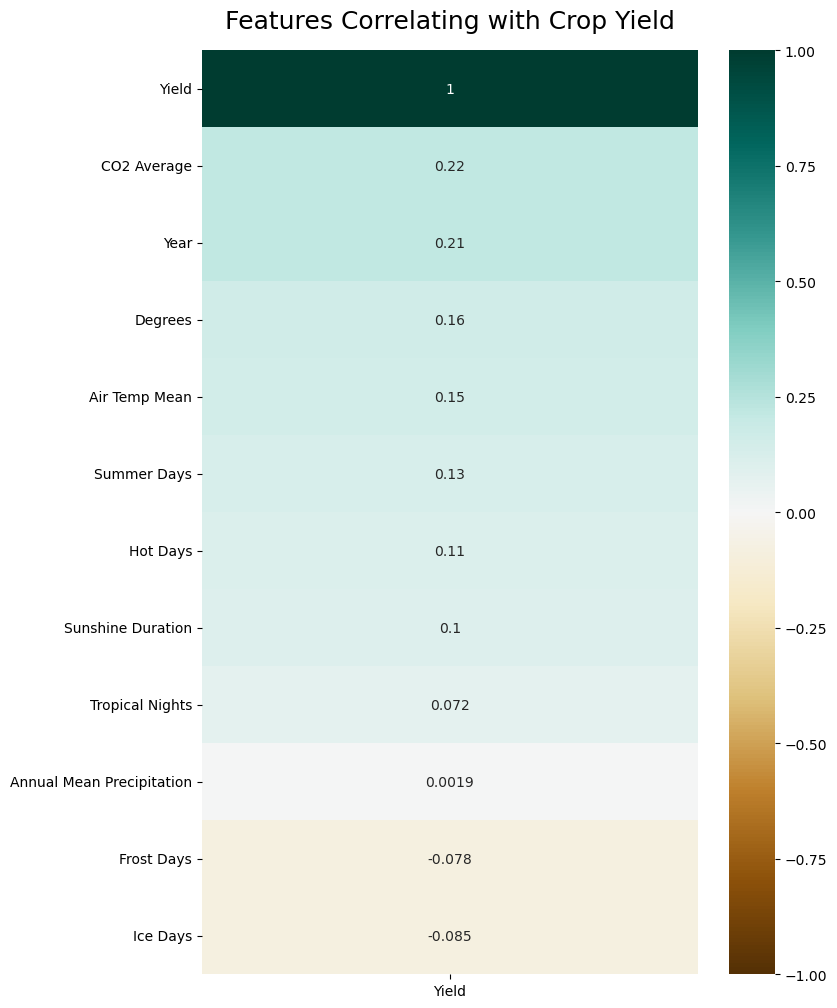

In [30]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(explore.corr()[['Yield']].sort_values(by='Yield', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Crop Yield', fontdict={'fontsize':18}, pad=16);

In [35]:
explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2791 entries, 0 to 2790
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       2791 non-null   int64  
 1   Yield                      2791 non-null   float64
 2   Degrees                    2791 non-null   float64
 3   Annual Mean Precipitation  2791 non-null   float64
 4   Air Temp Mean              2791 non-null   float64
 5   Frost Days                 2791 non-null   float64
 6   Hot Days                   2791 non-null   float64
 7   Ice Days                   2791 non-null   float64
 8   Summer Days                2791 non-null   float64
 9   Sunshine Duration          2791 non-null   float64
 10  Tropical Nights            2791 non-null   float64
 11  CO2 Average                2791 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 283.5 KB
